#### 2.Use Mean Field Approximation and coordinate ascent.

In [1]:
import numpy as np

# Define the grid size and beta values
grid_size = (10, 10)
beta_values = [4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0.01]
probability_tables = {}

# Mean field approximation function
def mean_field_probability(beta, m):
    return np.tanh(beta * m)  # Using equation 11

# Function to update the mean field values for the entire grid
def update_grid_mean_field(grid, beta):
    new_grid = np.zeros_like(grid)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Sum the mean field contributions from neighbors
            neighbors = [
                grid[i-1][j] if i > 0 else 0,
                grid[i+1][j] if i < grid_size[0] - 1 else 0,
                grid[i][j-1] if j > 0 else 0,
                grid[i][j+1] if j < grid_size[1] - 1 else 0
            ]
            m = np.mean(neighbors)
            new_grid[i][j] = mean_field_probability(beta, m)
    return new_grid

# Iterate over each beta value to compute the joint probability distribution for x1,10 and x10,10
for beta in beta_values:
    # Initialize mean field (magnetization) grid with random values
    grid = np.random.rand(*grid_size)
    
    # Iterating to find stable mean field values for the entire grid
    for _ in range(500000):
        new_grid = update_grid_mean_field(grid, beta)
        
        # Check for convergence in the entire grid
        if np.allclose(grid, new_grid, atol=1e-3):
            break
        
        grid = new_grid
    
    # Compute the joint probability distribution for nodes x1,10 and x10,10
    m1_10 = grid[0, 9]
    m10_10 = grid[9, 9]
    p_up_up = (1 + m1_10) * (1 + m10_10) / 4
    p_up_down = (1 + m1_10) * (1 - m10_10) / 4
    p_down_up = (1 - m1_10) * (1 + m10_10) / 4
    p_down_down = (1 - m1_10) * (1 - m10_10) / 4

    probability_tables[beta] = np.array([[p_up_up, p_up_down], [p_down_up, p_down_down]])

# Display the calculated probability tables for x1,10 and x10,10
for beta, probabilities in probability_tables.items():
    print(f"Beta: {beta}, Probability Table: {probabilities}")


Beta: 4, Probability Table: [[9.63565773e-01 1.80490077e-02]
 [1.80471692e-02 3.38050089e-04]]
Beta: 3.5, Probability Table: [[0.93954752 0.02979443]
 [0.02971572 0.00094233]]
Beta: 3, Probability Table: [[0.90023026 0.04856842]
 [0.04858035 0.00262096]]
Beta: 2.5, Probability Table: [[0.83249535 0.07997675]
 [0.07985622 0.00767168]]
Beta: 2, Probability Table: [[0.71422827 0.13096222]
 [0.13082178 0.02398772]]
Beta: 1.5, Probability Table: [[0.50767156 0.20487779]
 [0.20480058 0.08265007]]
Beta: 1, Probability Table: [[0.25074561 0.25000561]
 [0.24999328 0.2492555 ]]
Beta: 0.5, Probability Table: [[0.2500606  0.25000454]
 [0.24999546 0.24993941]]
Beta: 0.01, Probability Table: [[0.25000818 0.24999918]
 [0.25000082 0.24999182]]


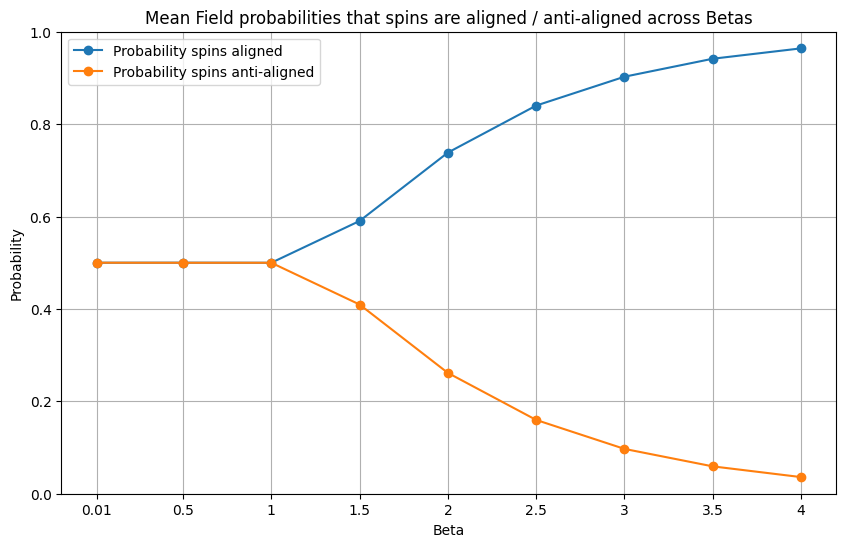

In [9]:
import matplotlib.pyplot as plt
import numpy as np

beta_values = [4, 3, 2, 1.5, 1, 0.5, 0.01]
probability_tables = {
    4: np.array([[0.96365, 0.0180], [0.0180, 0.0003308]]),
    3.5: np.array([[0.9406, 0.0296], [0.0296, 0.00093]]),
    3: np.array([[0.9000, 0.0485], [0.0485, 0.00262]]),
    2.5: np.array([[0.8325, 0.07989], [0.0798, 0.00766]]),
    2: np.array([[0.71448, 0.1307], [0.13077, 0.0239]]),
    1.5: np.array([[0.5078, 0.2047], [0.2048, 0.0826]]),
    1: np.array([[0.2506, 0.2500], [0.2499, 0.2493]]),
    0.5: np.array([[0.2502, 0.2499], [0.2500, 0.2499]]),
    0.01: np.array([[0.2500, 0.2500], [0.2500, 0.2500]]),
}

beta_values = sorted(probability_tables.keys())
aligned_probabilities = [probability_tables[beta][0, 0] + probability_tables[beta][1, 1] for beta in beta_values]
anti_aligned_probabilities = [probability_tables[beta][0, 1] + probability_tables[beta][1, 0] for beta in beta_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta_values, aligned_probabilities, 'o-', label='Probability spins aligned')
plt.plot(beta_values, anti_aligned_probabilities, 'o-', label='Probability spins anti-aligned')
plt.xlabel('Beta')
plt.ylabel('Probability')
plt.title('Mean Field probabilities that spins are aligned / anti-aligned across Betas')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.0)  # Establece el límite del eje y de 0 a 1.0
plt.xticks(beta_values, beta_values)  # Asegúrate de que todos los valores de beta se muestren en el eje x
plt.show()